# Author: Стурейко Игорь
## Project: Geekbrains.MatAnalise
## Lesson 9 - Производная функции нескольких переменных
## Date: 2020-06-15

__1.__ Исследовать на условный экстремум функцию

### $$U=3-8x+6y,$$

если

### $$x^2+y^2=36$$

$L(x, y, \lambda)=3-8x+6y+\lambda(x^2+y^2-36)$

In [87]:
from sympy import *
L, x, y, l = symbols('L x y l')
L = 3-8*x+6*y+l*(x**2+y**2-36)
L_x = diff(L,x)
L_y = diff(L,y)
L_l = diff(L, l)
nonlinsolve([L_x, L_y, L_l], [x, y, l])

FiniteSet((-24/5, 18/5, -5/6), (24/5, -18/5, 5/6))

In [88]:
L_xx = diff(L,x,x)
L_yy = diff(L,y,y)
L_ll = diff(L, l,l)
L_xy = diff(L,x, y)
L_xl = diff(L,x, l)
L_yl = diff(L, y, l)

In [89]:
L_xx

2*l

In [90]:
L_yy

2*l

In [91]:
L_ll

0

In [92]:
L_xy

0

In [93]:
L_xl

2*x

In [94]:
L_yl

2*y

Матрица Гессе $\begin{pmatrix}
0 & 2x & 2y\\
2x & 2\lambda & 0\\
2y & 0 & 2\lambda
\end{pmatrix} \Rightarrow \Delta = -8\lambda(x^2+y^2)=-288\lambda$

$\displaystyle \lambda = -\frac{5}{6} \Rightarrow \Delta > 0 \Rightarrow \Big(-\frac{24}{5}, \frac{18}{5} \Big)$ - точка максимума

$\displaystyle \lambda = \frac{5}{6} \Rightarrow \Delta < 0 \Rightarrow \Big(\frac{24}{5}, -\frac{18}{5} \Big)$ - точка минимума

__2.__ Исследовать на условный экстремум функцию

### $$U=2x^2+12xy+32y^2+15,$$

если

### $$x^2+16y^2=64$$

$L(x, y, \lambda)=2x^2+12xy+32y^2+15+\lambda(x^2+16y^2-64)$

In [127]:
L, x, y, l = symbols('L x y l')
L = 2*x**2+12*x*y+32*y**2+15+l*(x**2+16*y**2-64)
L_x = diff(L,x)
L_y = diff(L,y)
L_l = diff(L, l)
nonlinsolve([L_x, L_y, L_l], [x, y, l])

FiniteSet((-4*sqrt(2), sqrt(2), -1/2), (4*sqrt(2), sqrt(2), -7/2), (-4*sqrt(2), -sqrt(2), -7/2), (4*sqrt(2), -sqrt(2), -1/2))

In [96]:
L_xx = diff(L,x,x)
L_yy = diff(L,y,y)
L_ll = diff(L, l,l)
L_xy = diff(L,x, y)
L_xl = diff(L,x, l)
L_yl = diff(L, y, l)

In [97]:
L_xx

2*(l + 2)

In [98]:
L_yy

32*(l + 2)

In [99]:
L_ll

0

In [100]:
L_xy

12

In [101]:
L_xl

2*x

In [102]:
L_yl

32*y

Матрица Гессе $\begin{pmatrix}
0 & 2x & 32y\\
2x & 2\lambda+4 & 12\\
32y & 12 & 32\lambda+64
\end{pmatrix} \Rightarrow \Delta = -2x(2x(32\lambda+64)-16\cdot 24y)+32y(24x-32y(2\lambda+4))=64(2\lambda+4)(x^2+16y^2)+64\cdot 24xy=64^2(2\lambda+4)+64\cdot 24xy$

$\displaystyle \Big(-4\sqrt{2}, -\sqrt{2}, -\frac{7}{2}\Big), \Delta = 0$

$\displaystyle \Big(-4\sqrt{2}, \sqrt{2}, -\frac{1}{2}\Big),  \Delta=0$ 

$\displaystyle \Big(4\sqrt{2}, -\sqrt{2}, -\frac{1}{2}\Big), \Delta=0$

$\displaystyle \Big(4\sqrt{2}, \sqrt{2}, -\frac{7}{2}\Big), \Delta=0$

__3.__ Численно найти хотя бы один действительный корень системы нелинейных уравнений:
### $$\begin{cases}
   x^2-y^2+3xy^3-2x^2y^2+2x-3y-5=0 \\
   3y^3-2x^2+2x^3y-5x^2y^2+5=0
 \end{cases}$$

In [40]:
from scipy.optimize import fsolve
import math

def equations(p):
    x, y = p
    # Запись системы уравнения вида x+y=2, x-y=0
    return (x**2-y**2+3*x*y-2*x**2*y**2+2*x-3*y-5, 3*y**2-2*x**2+2*x**2*y**2+5)

# Численное решение системы уравнений
(x, y), info, ier, mesg =  fsolve(equations, (0, 0), full_output=True)
print (x, y, ier)

1.7183960364691415 -0.31891371900285403 1


__4*.__ Численно найти все $5$ действительных корней.

In [58]:
from scipy.optimize import fsolve, broyden1
import math

def equations(p):
    x, y = p
    # Запись системы уравнения вида x+y=2, x-y=0
    return (x**2-y**2+3*x*y-2*x**2*y**2+2*x-3*y-5, 3*y**2-2*x**2+2*x**2*y**2+5)

# Численное решение системы уравнений
solv = set()
for n in np.arange(-20, 10, 0.1):
    for s in np.arange(-5, 5, 0.1):
        (x, y), info, ier, mesg =  fsolve(equations, (n, s), full_output=True)
        if (ier == 1): solv.add((int(x*10**4)/10**4, int(y*10**4)/10**4))

print(*solv, sep='\n')

(2.5, 0.9999)
(1.7183, -0.3189)
(4.4638, 0.9018)


__5*.__ Даны две функции $y_{1}=f(x)$ и $y_{2}=g(x)$. Известно, что:

### $$f'(x)=\frac{1}{2}g(x)$$

### $$g'(x)=2-2f(x)$$

### $$f(0)=0$$

### $$g(0)=1$$

Восстановить функции $y_{1}=f(x)$ и $y_{2}=g(x)$ с помощью формулы:

### $$f(x+\Delta x) \approx f(x)+f'(x) \cdot \Delta x$$

на участке $[0, 20]$

В качестве решения построить график этих функций в одной системе координат.


### Решение:

Решим систему уравнений, она выражается через дифференциальное уроавнение 2-го порядка от $f(x)$

$ \begin{cases}
\displaystyle f'(x)=\frac{1}{2}g(x)\\
g'(x)=2-2f(x)
\end{cases} \Rightarrow \begin{cases}
g(x) = 2f'(x)\\
g'(x)=2f''(x)
\end{cases} \Rightarrow 2f''(x)+2f(x)-2=0 \Rightarrow f''(x)+f(x)=1$

Решаем сначала однородное уравнение $f''(x)+f(x)=0$ Характеристическое уроавнение будет: $\lambda^2=-1$, тогда общее решение представимо в виде: $f(x)=C_1\sin{x}+C_2\cos{x}$

Поскольку в правой части неоднородного уравнения $const$, то общее решение предсавимо в виде: $f(x)=C_1\sin{x}+C_2\cos{x}+C_3$

Подставляя в исходную систему для условия $g'(x)=2-2f(x)$, а так же условия для $f(0)=0$ и $g(0)=1$ получаем:

$\begin{cases}
\displaystyle f(x)=\frac{1}{2}\sin{x}-\cos{x}+1\\
g(x)=\cos{x}+2\sin{x}
\end{cases}$

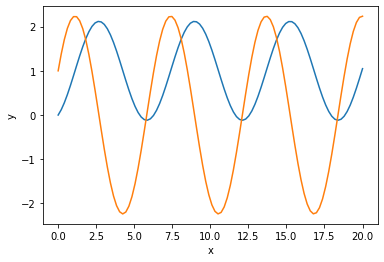

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,20,100)
y1=1/2*np.sin(x)-np.cos(x)+1
y2=np.cos(x)+2*np.sin(x)
plt.plot(x, y1, x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

__6**.__ Найти все корни уравнения:
    
### $$f(x)=g(x)$$

на участке $[0, 20]$

Где $y_{1}=f(x)$ и $y_{2}=g(x)$ - функции из предыдущего решения.

### Решение:

Уравнение $f(x)=g(x) \Rightarrow \displaystyle \frac{1}{2}\sin{x}-\cos{x}+1=\cos{x}+2\sin{x}$ можно упростить до вида: $-3\sin{x} - 4\cos{x} = 2$

In [39]:
from scipy.optimize import fsolve
import math

def equations(p):
    x = p
    # Запись системы уравнений
    return (-3*np.sin(x) - 4*np.cos(x) - 2)

# Численное решение системы уравнений
solv = set()
for n in np.arange(0,21):
    x, info, ier, mesg =  fsolve(equations, n, full_output=True)
    if (ier == 1 and x > 0 and x < 20): solv.add(int(x*10**8)/10**8)

print(*solv, sep='\n')

2.62581428
4.94437324
8.90899958
11.22755855
15.19218489
17.51074385
